## Test All Limits

In [1]:
# Install any packages you may be missing (only needed once)
!pip install tomlkit
!pip install importlib_resources

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import sys
sys.path.append('../')
from dd_limit_plot import DD_result
import matplotlib.pyplot as plt

In [3]:
import os
import glob

In [4]:
data_path = "../data"

In [5]:
# Use glob to match all .csv files in the folder
csv_files_full_path = glob.glob(os.path.join(data_path, '*.csv'))

# Extract just the file names
csv_file_names = [os.path.basename(file) for file in csv_files_full_path]

# Count the number of files
number_of_csv_files = len(csv_file_names)

print(f'Number of CSV files in {data_path}: {number_of_csv_files}')
print("List of CSV file names:")
for file_name in csv_file_names:
    print(file_name)

Number of CSV files in ../data: 21
List of CSV file names:
WIMPSI_DAMIC_2020.csv
WIMPSI_XENON1T_2019_S2only.csv
WIMPSI_PandaX-4T_2021_2107.13438.csv
WIMPSI_XENONnT_2023_2303.14729.csv
WIMPSI_XENONnT_2020_projection20ty.csv
WIMPSI_XENON1T_2018_1805.12562.csv
WIMPSI_LZ_2023_2207.03764.csv
nufloor_Billardetal_2014_1307.5458.csv
WIMPSI_XENON1T_2021_2fold.csv
WIMPSI_CDMSlite_2018.csv
WIMPSI_Darwin_2016_projection_200ty.csv
WIMPSI_DarkSide50_2018_lowE_noquench.csv
WIMPSI_XENON1T_2019_S2onlyMigdal.csv
WIMPSI_CRESSTIII_2019.csv
WIMPSDp_XENONnT_2023_2303.14729.csv
WIMPSI_PANDAXII_2020_2007.15469.csv
WIMPSI_darkside20k_2017_100ty.csv
WIMPSDn_LZ_2023_2207.03764.csv
WIMPSDn_XENONnT_2023_2303.14729.csv
WIMPSDp_LZ_2023_2207.03764.csv
WIMPSI_LZ_2019_projection.csv


Found upper_limit in WIMPSI_DAMIC_2020.csv
Found upper_limit in WIMPSI_XENON1T_2019_S2only.csv
Found upper_limit in WIMPSI_PandaX-4T_2021_2107.13438.csv
Found upper_limit in WIMPSI_XENONnT_2023_2303.14729.csv
Found sensitivity in WIMPSI_XENONnT_2020_projection20ty.csv
Found upper_limit in WIMPSI_XENON1T_2018_1805.12562.csv
Found upper_limit in WIMPSI_LZ_2023_2207.03764.csv
Found upper_limit in WIMPSI_XENON1T_2021_2fold.csv
Found upper_limit in WIMPSI_CDMSlite_2018.csv
Found sensitivity in WIMPSI_Darwin_2016_projection_200ty.csv
Found upper_limit in WIMPSI_DarkSide50_2018_lowE_noquench.csv
Found upper_limit in WIMPSI_XENON1T_2019_S2onlyMigdal.csv
Found upper_limit in WIMPSI_CRESSTIII_2019.csv
Found upper_limit in WIMPSDp_XENONnT_2023_2303.14729.csv
Found upper_limit in WIMPSI_PANDAXII_2020_2007.15469.csv
Found sensitivity in WIMPSI_darkside20k_2017_100ty.csv
Found upper_limit in WIMPSDn_LZ_2023_2207.03764.csv
Found upper_limit in WIMPSDn_XENONnT_2023_2303.14729.csv
Found upper_limit in 

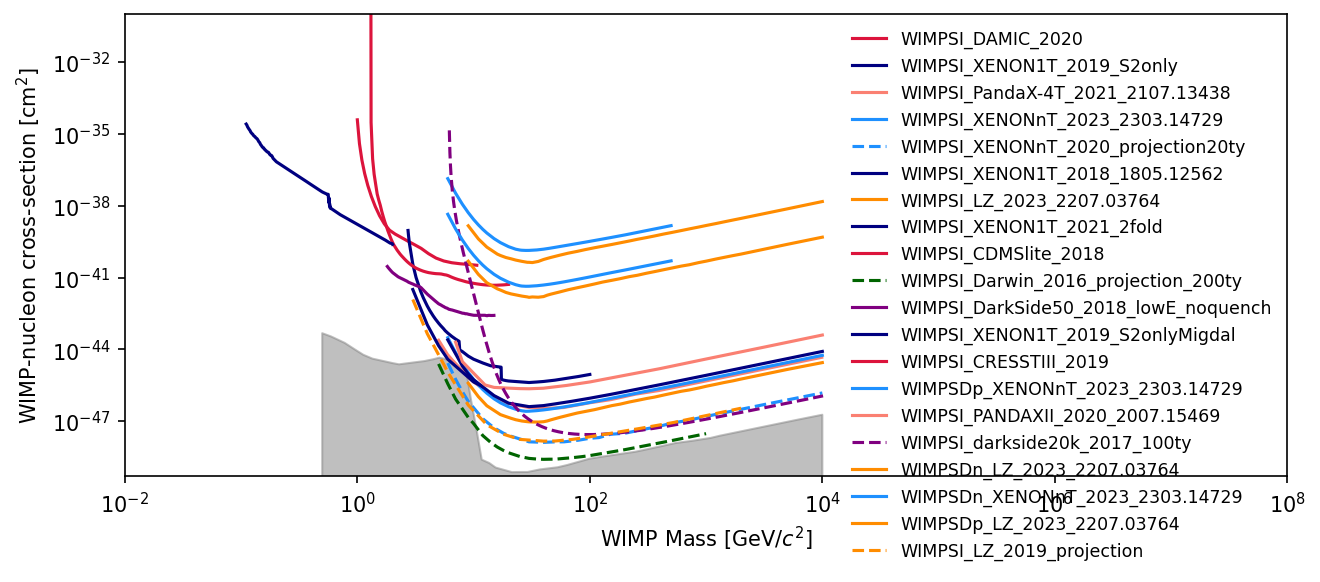

In [6]:
fig = plt.subplots(figsize=(10,4), dpi=150)

for file_name in csv_file_names:
    current_limit = DD_result(file_name)
    if "nufloor" in file_name:
        current_limit.plot_band(0., "nufloor", color="gray", alpha=0.5)
        continue
    try:
    # Attempt to access "upper_limit" as if current_limit supports item access
        upper_limit_value = current_limit["upper_limit"]
        # If the above line does not raise an exception, proceed with using upper_limit_value
        # For example, plotting or processing it
        print(f"Found upper_limit in {file_name}")
        current_limit.plot_upper_limit(label=file_name.replace(".csv", ""))
        continue
    except:
        pass
    try:
        sensitivity_value = current_limit["sensitivity_median"]
        print(f"Found sensitivity in {file_name}")
        current_limit.plot_sensitivity(label=file_name.replace(".csv", ""))
    except:
        print(f"Neither upper limit nor sensitivity exist in {file_name}")

plt.yscale("log")
plt.xscale("log")
plt.xlabel("WIMP Mass [GeV$/c^2$]")
plt.ylabel("WIMP-nucleon cross-section [cm$^2$]")
plt.xlim([1e-2, 1e8])
plt.ylim([5e-50, 1e-30])
plt.legend(loc='upper right', fontsize='small', frameon=False)
plt.show()